# Task A

In this task, we had to create a "transform" function which transforms unperformed beats time into a performed version.

In other words, given the `midi_score_annotations.txt` and `NAME_annotations.txt`, we need to create a function that transfers first column of the first file into the first column of the second file.

For the velocity, we use `*.mid` files and extract velocity from events. "Beat velocity" is defined as an average of the velocities of the events close to this beat. Event is close to the beat iff the difference between its onset in score and beat time is smaller than `0.5`. Then we again create a "transform" function.

In [3]:
%load_ext autoreload
%autoreload 2

from src.data import get_dataset_metadata, get_midi_performance_pairs, train_test_split, get_events_table_from_score, DATASET_PATH
from src.plots import plot_average_transfer_function
from src.estimators import get_estimator_predictions
from src.onset_distribution import compute_average_distribution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df, json_data = get_dataset_metadata("Bach")

In [5]:
df.head(2)

,composer,title,folder,xml_score,midi_score,midi_performance,performance_annotations,midi_score_annotations,maestro_midi_performance,maestro_audio_performance,start,end,audio_performance
0,Bach,Fugue_bwv_846,Bach/Fugue/bwv_846,Bach/Fugue/bwv_846/xml_score.musicxml,Bach/Fugue/bwv_846/midi_score.mid,Bach/Fugue/bwv_846/Shi05M.mid,Bach/Fugue/bwv_846/Shi05M_annotations.txt,Bach/Fugue/bwv_846/midi_score_annotations.txt,{maestro}/2006/MIDI-Unprocessed_19_R1_2006_01-...,{maestro}/2006/MIDI-Unprocessed_19_R1_2006_01-...,144.567708,NaN,Bach/Fugue/bwv_846/Shi05M.wav
1,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/Denisova06M.mid,Bach/Fugue/bwv_848/Denisova06M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2008/MIDI-Unprocessed_02_R1_2008_01-...,{maestro}/2008/MIDI-Unprocessed_02_R1_2008_01-...,69.317708,NaN,Bach/Fugue/bwv_848/Denisova06M.wav


In [6]:
# for the first time might take up to 7 min because of velocity
beats_list_dict = get_midi_performance_pairs(df, json_data)

In [7]:
train_beats_list_dict, test_beats_list_dict = train_test_split(beats_list_dict, test_size=0.2)

169 136 33


In [8]:
midi_beats_list = test_beats_list_dict["midi_beats_list"]
performance_beats_list = test_beats_list_dict["performance_beats_list"]
perf_velocity_beats_list = test_beats_list_dict["perf_velocity_beats_list"]

performance_beats_estimated_list_dict = {}
perf_velocity_beats_estimated_list_dict = {}

In [9]:
# random estimate
performance_beats_estimated_list, velocity_beats_estimated_list = get_estimator_predictions(train_beats_list_dict,
                                                                                            test_beats_list_dict,
                                                                                            estimator_type="random")

performance_beats_estimated_list_dict["random"] = performance_beats_estimated_list
perf_velocity_beats_estimated_list_dict["random"] = velocity_beats_estimated_list

In [10]:
# linear estimate
performance_beats_estimated_list, velocity_beats_estimated_list = get_estimator_predictions(train_beats_list_dict,
                                                                                            test_beats_list_dict,
                                                                                            estimator_type="linear")

performance_beats_estimated_list_dict["linear"] = performance_beats_estimated_list
perf_velocity_beats_estimated_list_dict["linear"] = velocity_beats_estimated_list

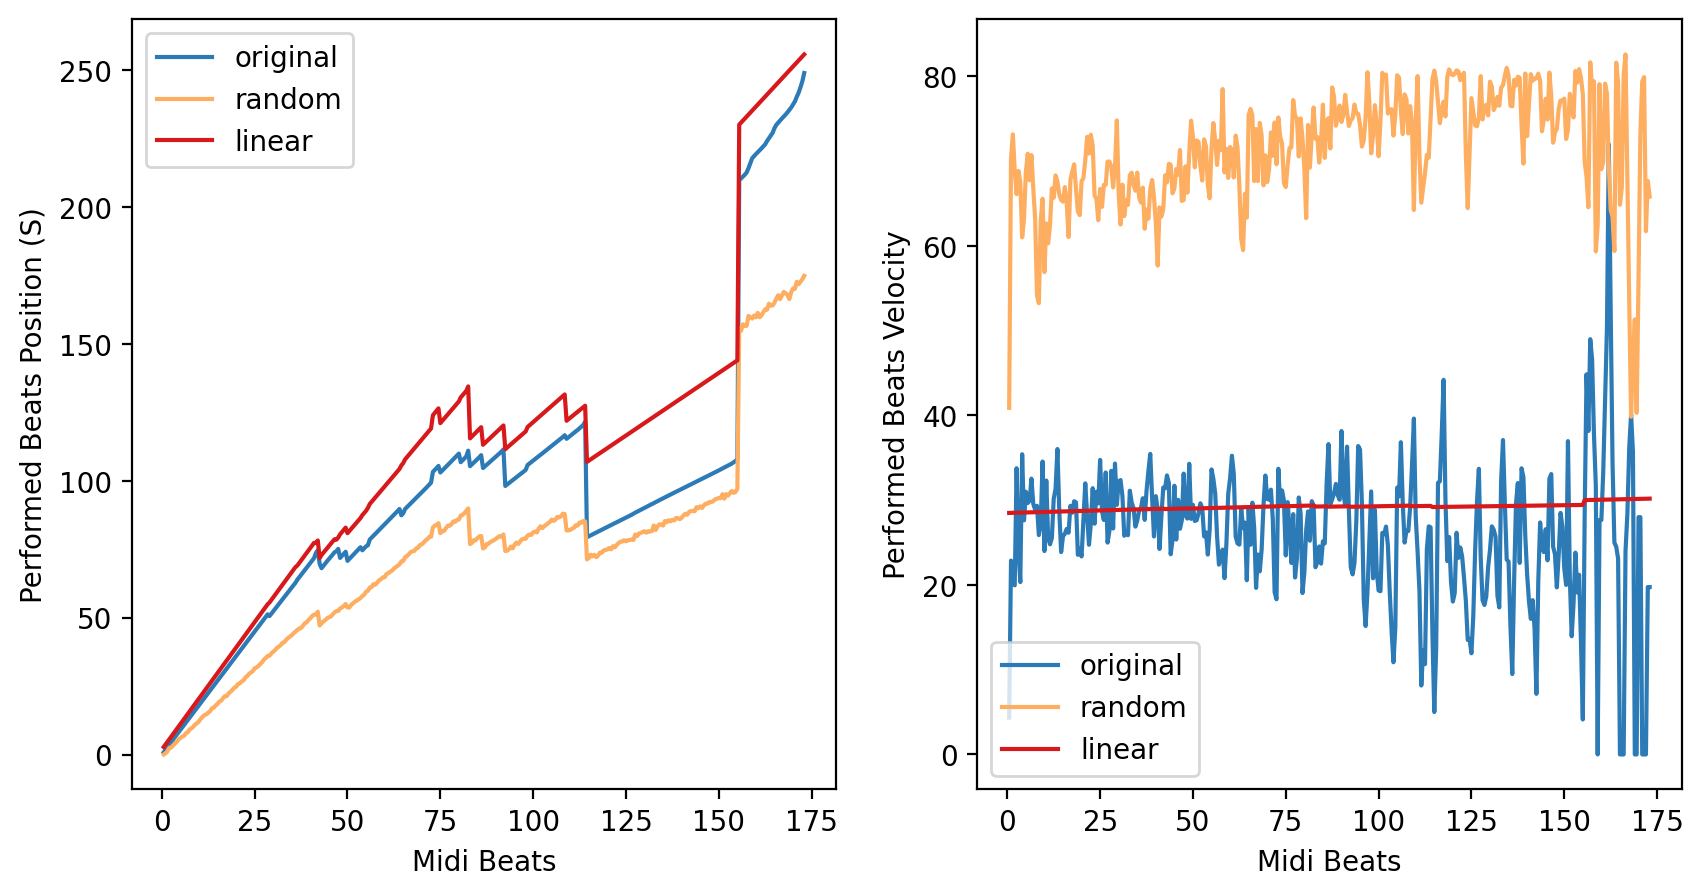

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0] = plot_average_transfer_function(axes[0], midi_beats_list,
                                        performance_beats_list,
                                        performance_beats_estimated_list_dict,
                                        performance_type="time"
)

axes[1] = plot_average_transfer_function(axes[1], midi_beats_list,
                                        perf_velocity_beats_list,
                                        perf_velocity_beats_estimated_list_dict,
                                        performance_type="velocity"
)

# Task B

Use `src.data.get_events_table_from_score`

In [ ]:
# We analyse Bach's Fugues (or other?)
corpus = DATASET_PATH / "Bach" / "Fugue"
# TODO : fetch the time signature from the XML (<time>), and group by time signature to perform one experiment for each
four_four = [
    "bwv_846",
    "bwv_848",
]
score_paths = [corpus / piece / "midi_score.mid" for piece in four_four]
compute_average_distribution(score_paths, sig=(4,4), subdivision=4)